## **Context**
 Customer Churn is when customers stop purchasing/using business's products or service in certain period of time. Customer churn is one critical metric because it's less expensive to retain existing customers than acquire new customers. In this kernel, I'll analyze E-commerce customer churn rate and looking for user patterns whos likely churned. Customer churn rate indicates how many existing customers are not using products-services or switch to business competitors.

## **Import Dataset and Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_excel('/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx', sheet_name='E Comm')
data_desc = pd.read_excel('/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])
data_desc

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


## **Diving To The Dataset**

In [2]:
# Let's take a peak what kind of data we have.
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


> From 5 row above we already see some null values. We'll handle that missing values later

In [3]:
# Remove 'CustomerID' from dataset
del data['CustomerID']

In [4]:
# I wonder how many rows and columns in this dataset and their dtypes
print('Data shape: %d rows and %d cols.' % data.shape)

data.info()

Data shape: 5630 rows and 19 cols.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-nul

>There are 5.630 rows and 20 cols.

In [5]:
# Next question, how many missing values in each column? 

total_na = data.isnull().sum().sum()
print(f"Total missing values: {total_na} ({ round((total_na/data.shape[0])*100, 2) }%)")

data.isnull().sum()

Total missing values: 1856 (32.97%)


Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

> We have total 1.856 missing values, it's about 32.97% from total data.

In [6]:
# Before we handle missing values, let's see the statistical summary of this dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00


> In summary, the mean and median in each column are so close from each other. So I decided to filling all the missing values with median, since some feature will make more sense if they had integer values like Complain, CouponUsed, OrderCount, etc. *(like there's no such things like "I used coupon 1.75 times" or "User has 0.2 complained")*

In [7]:
# Now let's fill those missing values
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)
        
# Done. Checking the missing values for the last time
data.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

> Looking good.

## **Data Exploration and Visualization**

### The Percentage of Customer Churn

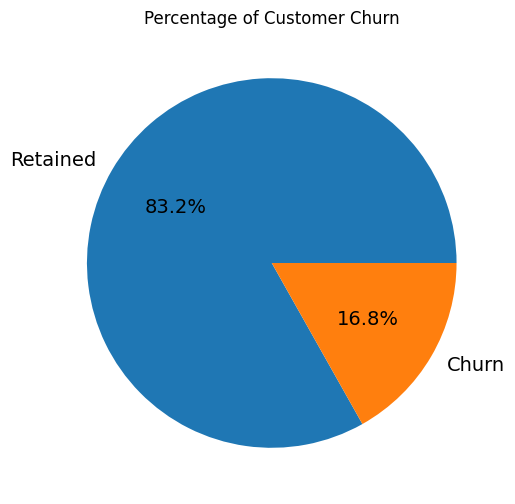

In [8]:
# First, what is the percentage of customer churn
labels = ['Retained','Churn']
counts = data['Churn'].value_counts()
# print(counts)

plt.figure(figsize=(6,6))
plt.title('Percentage of Customer Churn')
plt.pie(counts, autopct='%1.1f%%', labels=labels, textprops={"fontsize":14})
plt.show()

> There are 4.682 users (82.2%) retained, while 948 users (16.8%) has churned. *WOW! It's like from 5 customers, 4 of them retained.*

### Customer Churn based on Gender

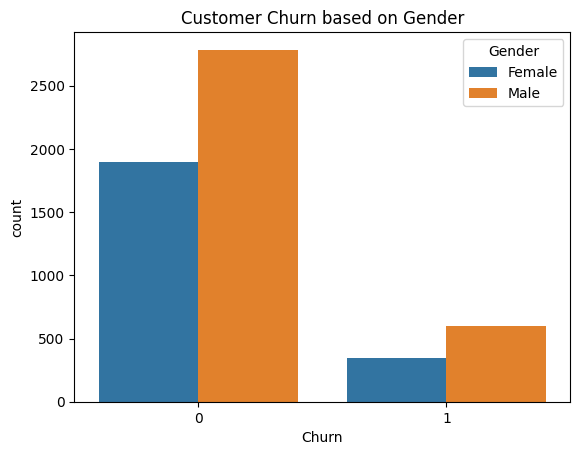

In [9]:
# Which gender most like to churn?
sns.countplot(x=data['Churn'], hue=data['Gender'])
plt.title('Customer Churn based on Gender')
plt.show()

> Male customer tends to churn than female, but also likely to retained.

### Distribution of Order Count of Customers

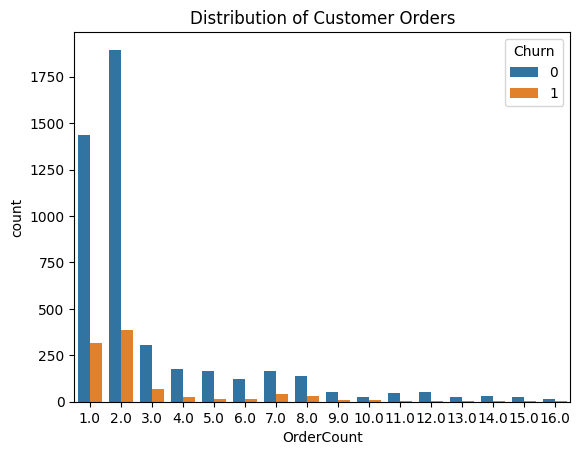

In [10]:
sns.countplot(x=data['OrderCount'], hue=data['Churn'])
plt.title("Distribution of Customer Orders")
plt.show()

> Most customers only ordered 1-2 times. 

### Customer Preferred Login Device

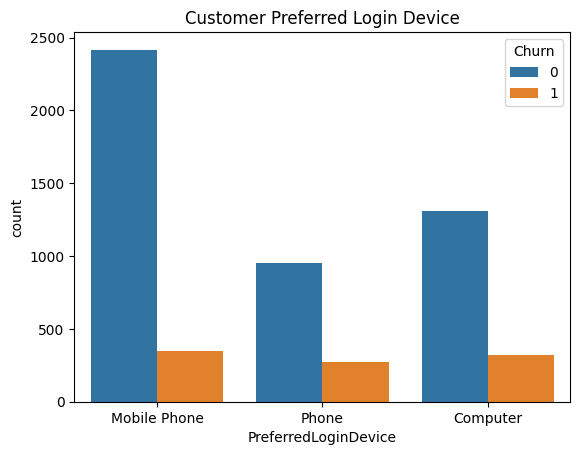

In [11]:
sns.countplot(x=data['PreferredLoginDevice'], hue=data['Churn'])
plt.title('Customer Preferred Login Device')
plt.show()

> Churn: The number of mobile phone, phone, and computer is likely close with average 316 customer.

### Customer Preferred Payment

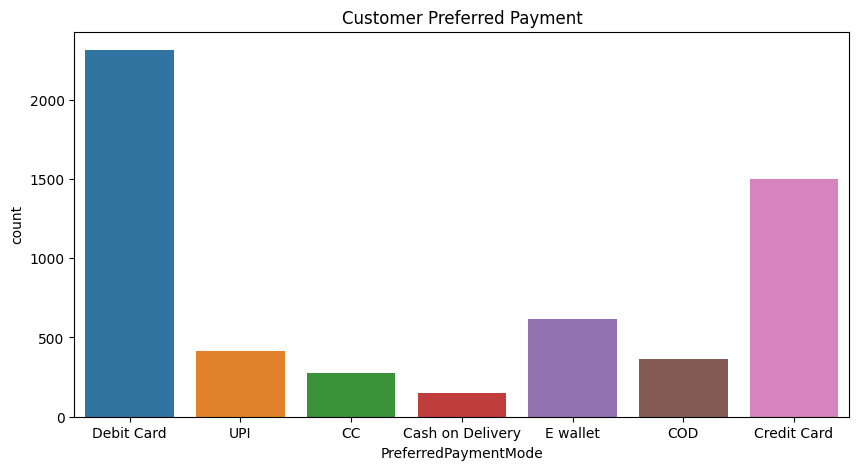

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['PreferredPaymentMode'])
plt.title('Customer Preferred Payment')
plt.show()

> Customers prefer to make payments with debit and credit cards.

### Customer Preferred Order Category

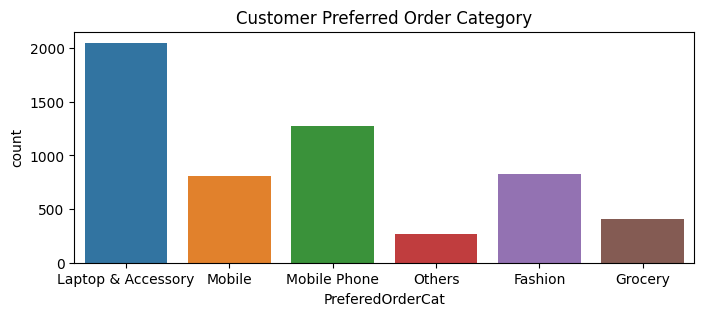

In [13]:
plt.figure(figsize=(8,3))
sns.countplot(x=data['PreferedOrderCat'])
plt.title('Customer Preferred Order Category')
plt.show()

> In this E-commerce, customers order category for Laptop & Accessory is higher than other categories.

### Customer Distance from Warehouse to Home

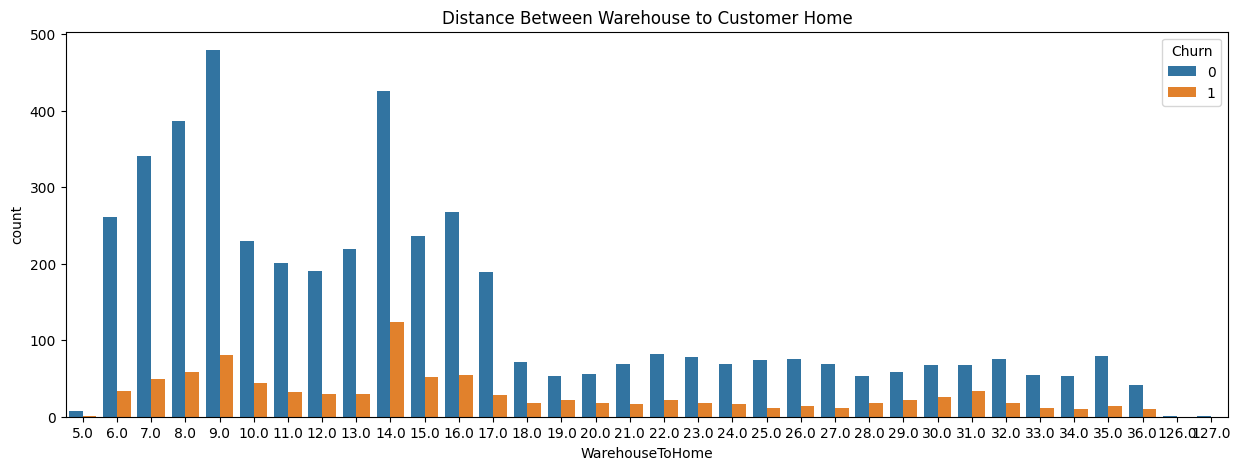

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['WarehouseToHome'], hue=data['Churn'])
plt.title('Distance Between Warehouse to Customer Home')
plt.show()

> This figure shows there is no correlation between warehouse to home distance with customer churn. But we'll confirm this with correlation matrix.

### Customer City Tier

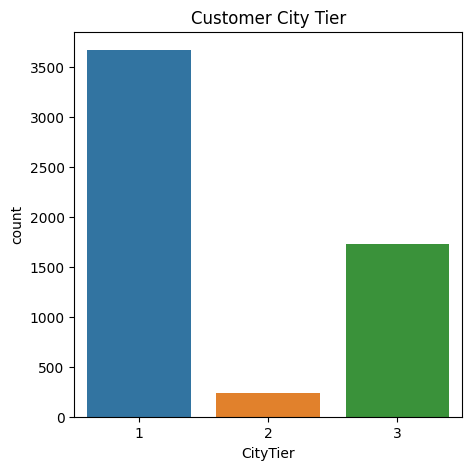

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['CityTier'])
plt.title('Customer City Tier')
plt.show()

> City Tier 2, has low number customer.

### Customer Hour Spend On App 

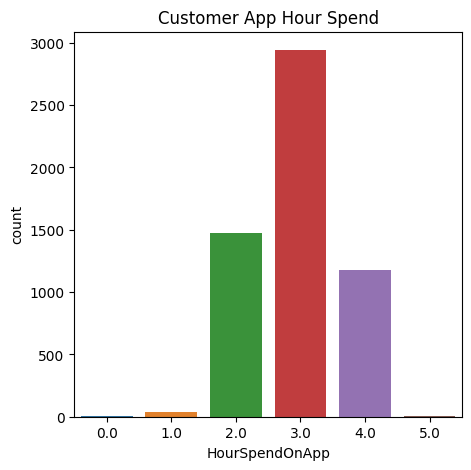

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['HourSpendOnApp'])
plt.title('Customer App Hour Spend')
plt.show()

> People like to spend 2-4 hours on this E-commerce app

### Customers Satisfaction Score

Average Satisfaction Score: 3.066785079928952


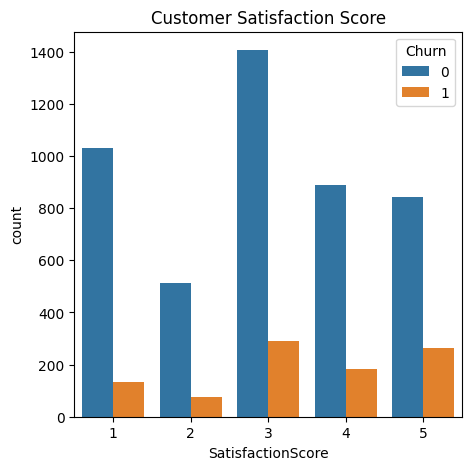

In [17]:
average_score = data['SatisfactionScore'].mean()
print('Average Satisfaction Score:',average_score)

plt.figure(figsize=(5,5))
sns.countplot(x=data['SatisfactionScore'], hue=data['Churn'])
plt.title('Customer Satisfaction Score')
plt.show()

> From scale 1-5 the average satisfaction score is 3.06. Customers satisfaction are neutral.

### Customer Marital Status

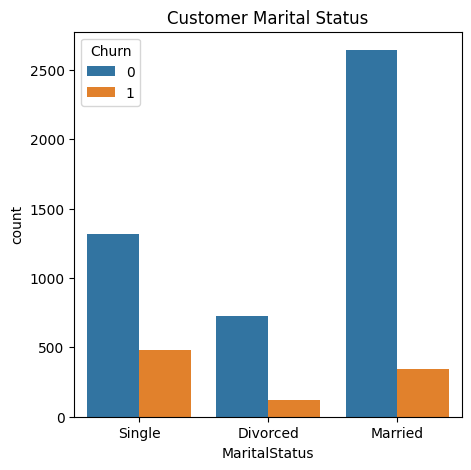

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['MaritalStatus'], hue=data['Churn'])
plt.title('Customer Marital Status')
plt.show()

### Customer Complains

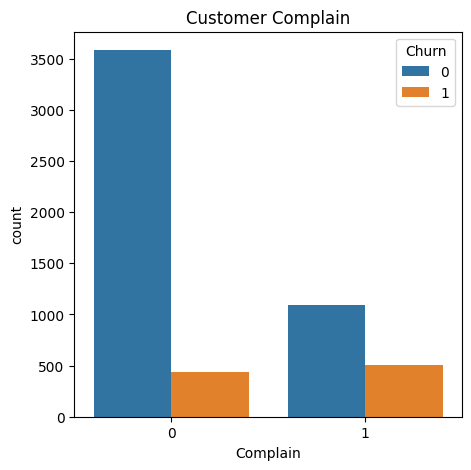

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Complain'], hue=data['Churn'])
plt.title('Customer Complain')
plt.show()

> Customers who churn more likely complain in their last month.

### Customer Order

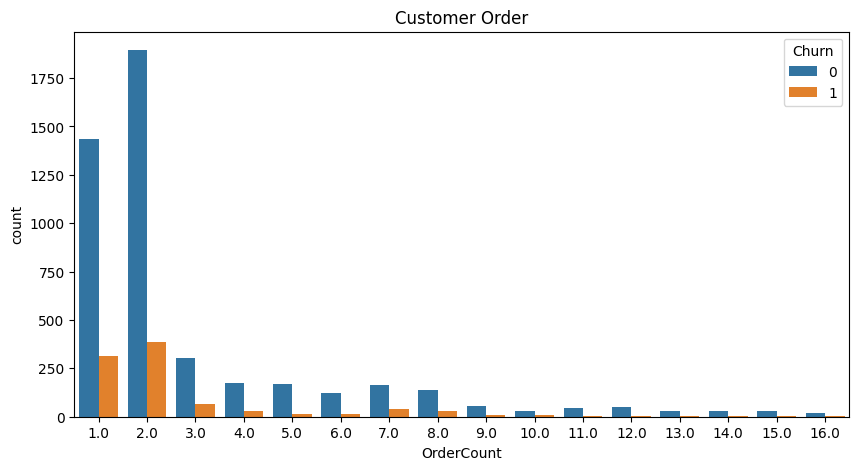

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['OrderCount'], hue=data['Churn'])
plt.title('Customer Order')
plt.show()

> From figure above notice that high number in their 1st and 2nd order, this means customer churn after their first or second order.

### Customer Used Coupon

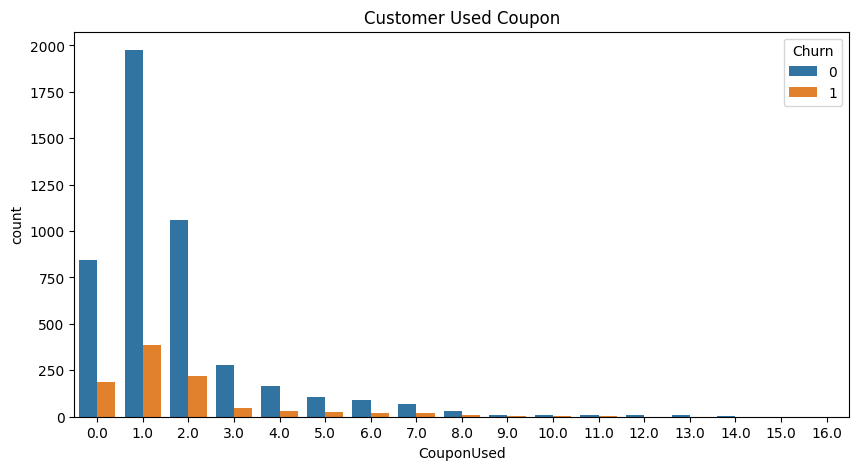

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['CouponUsed'], hue=data['Churn'])
plt.title('Customer Used Coupon')
plt.show()

> 

### Customer Day Since Last Order

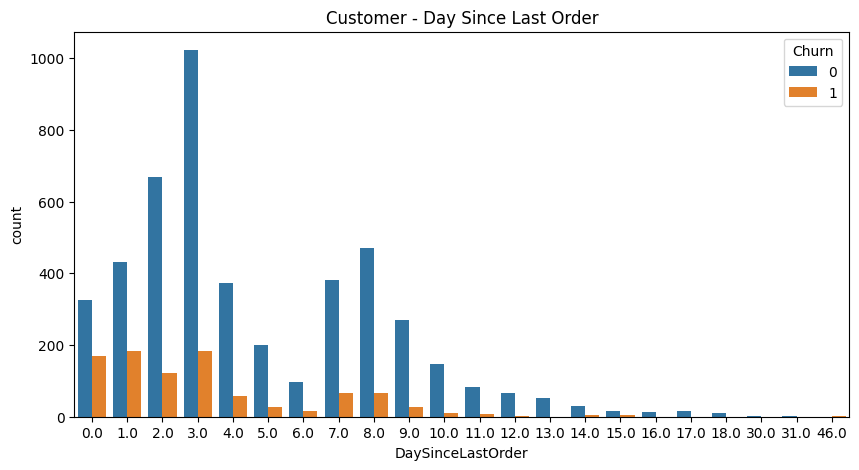

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['DaySinceLastOrder'], hue=data['Churn'])
plt.title('Customer - Day Since Last Order')
plt.show()

> We notice customers leave e-commerce after a week since their last order

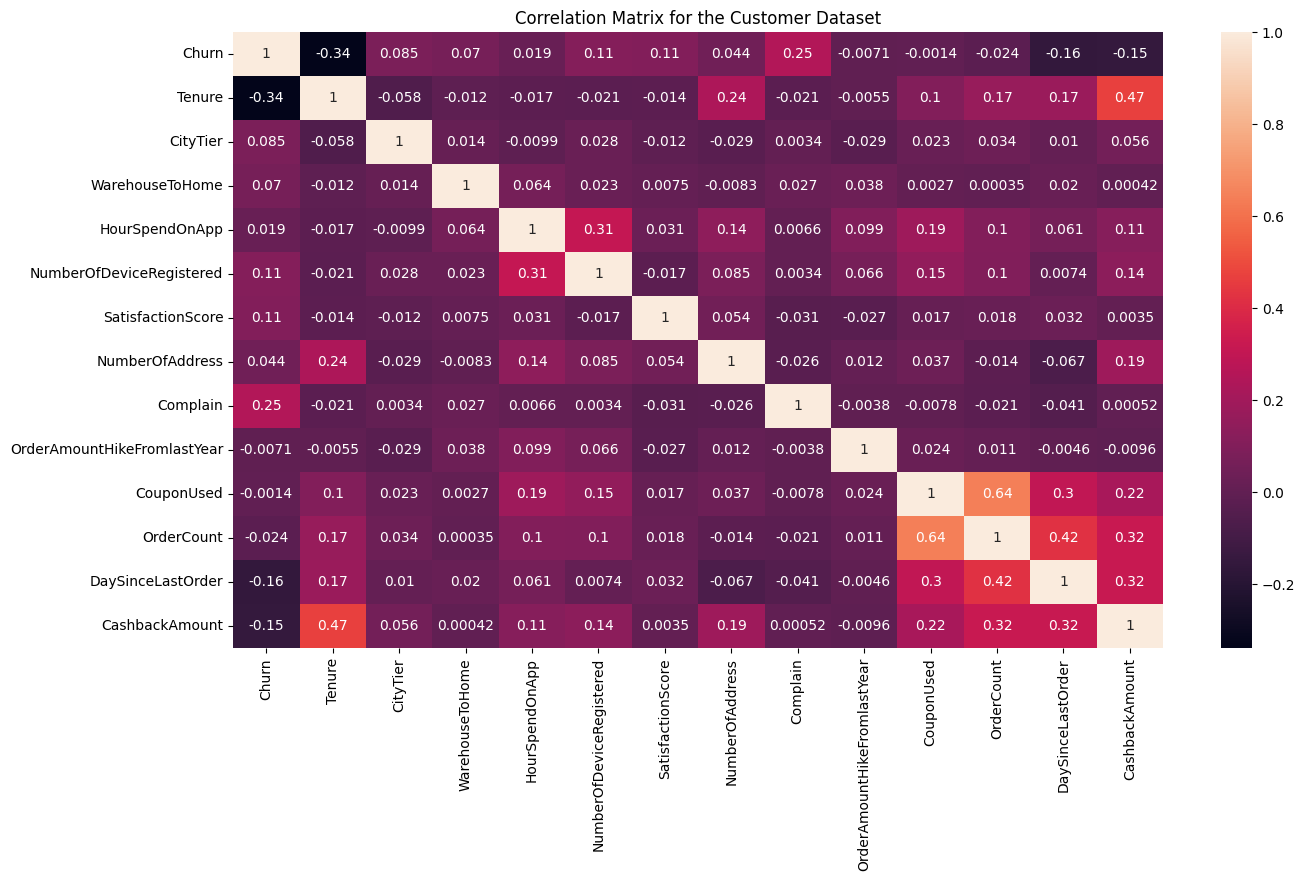

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()

### Findings from analysis:
> 1. There are 4.682 users (82.2%) retained, while 948 users (16.8%) has churned.
2. Customers spend 2-4 hours in the app.
3. Customers mostly only order 1-2 times. 
4. Warehouse to home distance doesn't affect customer churn.
5. Customers who complain and also with single status have higher churn rate
6. From correlation matrix, correlation between WarehouseToHome and Churn is 0.07 (0.069544 to be more precise). This means weak or no correlation.

## **Data Preprocessing**

In [24]:
# Create function to convert column with dtype object to integer
def object_to_int(x):
    if x.dtype == 'object':
        x = LabelEncoder().fit_transform(x)
    return x

# Convert column dtype object to int
data = data.apply(lambda x : object_to_int(x))

Since this dataset 'Churn' feature only had 948 (16.8%) customer churn with total 5.630 customers, this make our 'Churn' feature imbalance. In this case, I will apply oversampling method to balance the dataset.

In [25]:
# balance dataset with oversampling
from sklearn.utils import resample
data_0 = data.loc[data['Churn'] == 0]
data_1 = data.loc[data['Churn'] == 1]

# Count total each churn feature
n_0 = len(data_0)
n_1 = len(data_1)

# Applying oversampling method
data_oversampling = resample(data_1, replace=True, n_samples=n_0, random_state=42)
data_new = pd.concat([data_oversampling, data_0])
data_new = data_new.sample(frac=1)
data_new.reset_index(drop=True, inplace=True)

In [26]:
# Check total of churn data after apply oversampling method
data_new['Churn'].value_counts()

Churn
1    4682
0    4682
Name: count, dtype: int64

> Now our dataset have balance churn feature. Let's build Maching Learning Model!!

In [27]:
# preferredlogindevice 
# mobile phone, phone, computer
# [1, 2, 0]

# PreferedOrderCat
# ['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others','Fashion', 'Grocery']
# [2, 3, 4, 5, 0, 1]

# preferred payment mode
# ['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD','Credit Card']
# [4, 6, 0, 2, 5, 1, 3]

# gender
# female male
# [0, 1]

# marital status
# ['Single', 'Divorced', 'Married']
# [2, 0, 1]

## **Machine Learning Model**
In this section, I will implementing Logistic Regression, KNN and SVC to compare each model and to see which model have the better accuracy to predict customer churn.

In [28]:
# First we need to the data into 70% training dataset and 30% testing dataset
X = data_new.drop(['Churn'],axis=1)
y = data_new['Churn']

from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
logreg_prediction = logreg.predict(X_test)
print('Accuracy Score: %s ' % accuracy_score(y_test, logreg_prediction))
print(classification_report(y_test, logreg_prediction))

Accuracy Score: 0.797508896797153 
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1423
           1       0.78      0.82      0.80      1387

    accuracy                           0.80      2810
   macro avg       0.80      0.80      0.80      2810
weighted avg       0.80      0.80      0.80      2810



### K-Nearest Neighbor (KNN)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_prediction = logreg.predict(X_test)
print('Accuracy Score: %s ' % accuracy_score(y_test, knn_prediction))
print(classification_report(y_test, knn_prediction))

Accuracy Score: 0.797508896797153 
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1423
           1       0.78      0.82      0.80      1387

    accuracy                           0.80      2810
   macro avg       0.80      0.80      0.80      2810
weighted avg       0.80      0.80      0.80      2810



### Support Vector Machine (SVM)

In [31]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)
print('Accuracy Score: %s' % accuracy_score(y_test, svc_prediction))
print(classification_report(y_test, svc_prediction))

Accuracy Score: 0.7622775800711744
              precision    recall  f1-score   support

           0       0.81      0.69      0.75      1423
           1       0.72      0.84      0.78      1387

    accuracy                           0.76      2810
   macro avg       0.77      0.76      0.76      2810
weighted avg       0.77      0.76      0.76      2810



## **Conclusion**
After build 3 Machine Learning Model and also testing it. Here's the summary of each models result:
   * **Logistic Regression:** 
      - Accuracy Score: 0.79
      - Customer Churn Precision: 0.80
      - Customer Churn Recall: 0.80
      
      
   * **K-Nearest Neighbor (KNN):**
      - Accuracy Score: 0.79
      - Customer Churn Precision: 0.80
      - Customer Churn Recall: 0.80
      
      
   * **Support Vector Machine (SVM):**
      - Accuracy Score: 0.76
      - Customer Churn Precision: 0.75
      - Customer Churn Recall: 0.82
   
This models can be improved by tuning the hyperparameter to make prediction more accurate. 

**Thank you!**